# Figures

Prepared for "Labor and the recovery" presentation for the UW Now series on October 12, 2021. 

The file 'cycle dates pasted.csv' is from [data.nber.org/data/cycles/](http://data.nber.org/data/cycles/).  All other data are accessed from the FRED database.

Kim J. Ruhl 

In [6]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

In [7]:
# Define figure constants
fig_tick_size = 18
fig_line_wt = 2.5

In [8]:
# Business cycle dates
cycle = pd.read_csv('cycle dates pasted.csv')
cycle.peak = pd.to_datetime(cycle.peak)
cycle.trough = pd.to_datetime(cycle.trough)

## Employment population ratio

In [9]:
emp = web.DataReader(['EMRATIO', 'PAYEMS', 'LFWA64TTUSM647S'], 'fred', start = '1950-01-01')
emp.tail(1)

,EMRATIO,PAYEMS,LFWA64TTUSM647S
DATE,,,
2021-09-01,58.7,147553,2.050531e+08


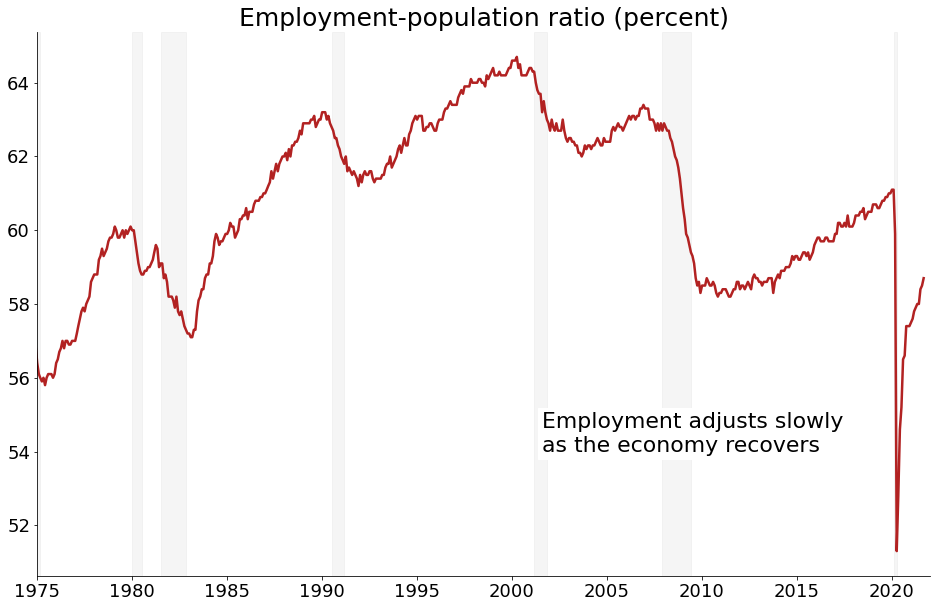

In [10]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.set_title('Employment-population ratio (percent)', fontsize=25)

ax.plot(emp.index, emp.EMRATIO, color='firebrick', lw=fig_line_wt)
#ax.plot(emp.index, emp.emp_wap, color='black', lw=fig_line_wt)

for c in range(24,35):
    plt.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)

ax.text(dt.datetime(2001,8,1), 54, 'Employment adjusts slowly\nas the economy recovers', fontsize=22, ha='left',
       backgroundcolor='white')

ax.set_xlim(dt.datetime(1975,1,1), dt.datetime(2022,1,1))

sns.despine()

plt.savefig('figures/emp-pop.svg', bbox_inches='tight')

## Economy-wide hiring and separation rates

In [11]:
jolts = web.DataReader(['JTSHIR', 'JTSTSR'], 'fred', start = '2000-01-01')

## Job openings rate

In [12]:
opens = web.DataReader(['JTS7000JOR', 'JTS7200JOR', 'JTS7100JOR', 'JTS3000JOR', 'JTS2300JOR', 'JTSJOR', 'JTSJOL',
                       'JTS540099JOR', 'JTS6200JOR', 'JTS4400JOR', 'JTS4000JOR', 'JTS6000JOR'], 'fred', start = '2019-01-01')
opens = opens.rename(columns={'JTS7000JOR': 'leis_hosp', 'JTS7200JOR':'accom_food', 'JTS7100JOR':'arts_rec',
                             'JTS3000JOR':'man', 'JTS2300JOR':'con', 'JTSJOR':'total', 'JTSJOL':'total_levels',
                             'JTS540099JOR':'prof_bus', 'JTS6200JOR':'health_soc', 'JTS4400JOR':'retail', 'JTS4000JOR':'trans',
                             'JTS6000JOR':'educ'})
opens.head(2)
opens.tail(2)

,leis_hosp,accom_food,arts_rec,man,con,total,total_levels,prof_bus,health_soc,retail,trans,educ
DATE,,,,,,,,,,,,
2021-07-01,11.2,11.3,10.2,6.8,4.5,7.0,11098,8.1,8.1,6.9,6.5,7.7
2021-08-01,10.1,10.2,9.2,6.5,4.4,6.6,10439,7.9,7.1,7.2,6.8,6.8


In [13]:
# The 2019 average and the latest value
pre_mean = opens.loc['2019', 'total_levels'].mean()*1000
latest = opens.tail(1)['total_levels'].values[0]*1000

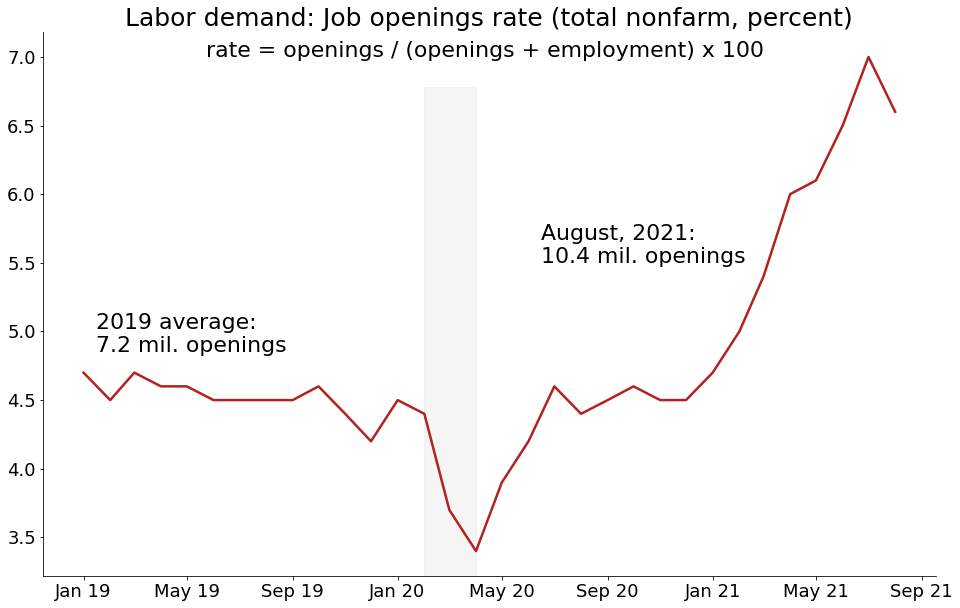

In [14]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.set_title('Labor demand: Job openings rate (total nonfarm, percent)', fontsize=25)


ax.plot(opens.index, opens.total, color='firebrick', lw=fig_line_wt)

ax.text(dt.datetime(2021,3,2), 7, 'rate = openings / (openings + employment) x 100', fontsize=22, ha='right')
ax.text(dt.datetime(2019,1,15), 4.85, '2019 average:\n{:,.1f} mil. openings'.format(pre_mean/1000000), fontsize=22, ha='left')
ax.text(dt.datetime(2020,6,15), 5.5, 'August, 2021:\n{:,.1f} mil. openings'.format(latest/1000000), fontsize=22, ha='left')

ax.axvspan(cycle.loc[34,'peak'],cycle.loc[34,'trough'], color='silver', alpha=0.15, ymax=0.9)

sns.despine()

plt.savefig('figures/open-total.svg', bbox_inches='tight')

In [15]:
# Keep the April 2020 and 2021 data. 
t = opens.loc[(opens.index=='2020-07-01') | (opens.index=='2021-07-01')]
t = t.drop('total_levels', axis=1)
t = t.stack()
t = t.reset_index()
t.columns = ['date', 'ind', 'value']
t = t.sort_values('value', ascending=False)
t.loc[t.ind=='arts_rec','label'] = 'Arts, enter., and recreation'
t.loc[t.ind=='leis_hosp','label'] = 'Leisure and hospitality'
t.loc[t.ind=='accom_food','label'] = 'Accom. and food service'
t.loc[t.ind=='prof_bus','label'] = 'Prof. and bus. services'
t.loc[t.ind=='man','label'] = 'Manufacturing'
t.loc[t.ind=='health_soc','label'] = 'Health care and social assist.'
t.loc[t.ind=='retail','label'] = 'Retail'
t.loc[t.ind=='trans','label'] = 'Wholesale, transport, util.'
t.loc[t.ind=='educ','label'] = 'Education'
t.loc[t.ind=='con','label'] = 'Construction'
t = t[t.ind!='total']
t.head(2)

,date,ind,value,label
12,2021-07-01,accom_food,11.3,Accom. and food service
11,2021-07-01,leis_hosp,11.2,Leisure and hospitality


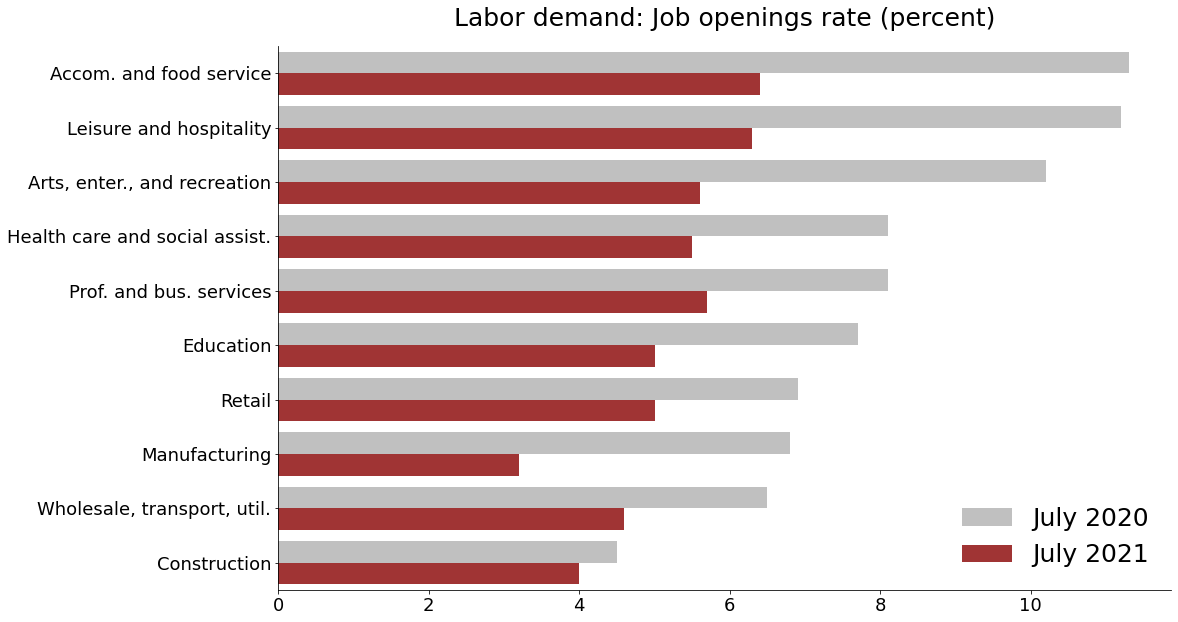

In [16]:
fig, ax = plt.subplots(figsize=(16,10))
ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.set_title('Labor demand: Job openings rate (percent)', fontsize=25, pad=20)

bs = sns.barplot(y=t.label, x=t.value, hue=t.date, ci=None, ax=ax, palette=['silver', 'firebrick'])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine()

ax.legend(labels=['July 2020', 'July 2021'], fontsize=25, frameon=False)

#plt.show()

plt.savefig('figures/open-bar.svg', bbox_inches='tight')

In [17]:
save = web.DataReader(['PSAVERT'], 'fred', start = '2000-01-01')
save.columns = ['rate']
save.head(1)

,rate
DATE,
2000-01-01,5.0


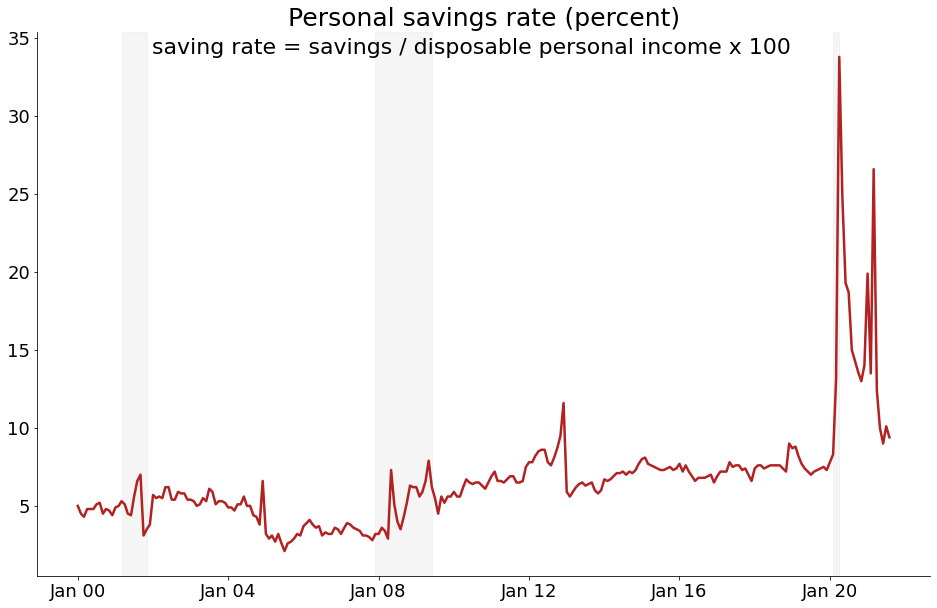

In [18]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.set_title('Personal savings rate (percent)', fontsize=25)


ax.plot(save.index, save.rate, color='firebrick', lw=fig_line_wt)

for c in range(32,35):
    ax.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)

ax.text(dt.datetime(2018,12,15), 34, 'saving rate = savings / disposable personal income x 100', fontsize=22, ha='right')

sns.despine()

plt.savefig('figures/save-rate.svg', bbox_inches='tight')




## Unemployment

In [19]:
unemp = web.DataReader(['WIUR', 'UNRATE', 'LNS14000002', 'LNS14000001'], 'fred', '2000-01-01')       # monthly
unemp.tail(2)

,WIUR,UNRATE,LNS14000002,LNS14000001
DATE,,,,
2021-08-01,3.9,5.2,5.0,5.4
2021-09-01,3.9,4.8,4.5,5.0


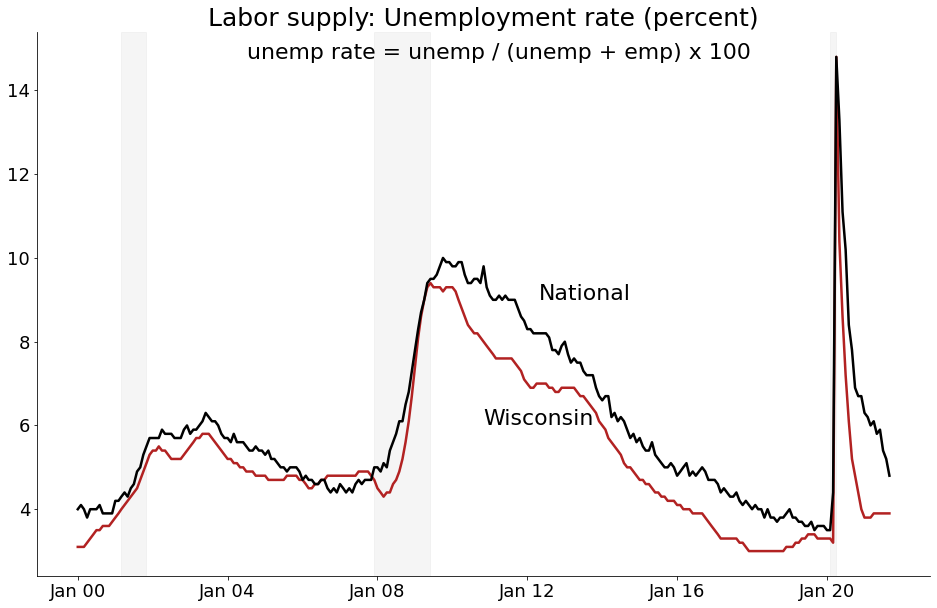

In [20]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.set_title('Labor supply: Unemployment rate (percent)', fontsize=25)

ax.plot(unemp.index, unemp['WIUR'], color='firebrick', lw=fig_line_wt,  label='WI unemp. rate')
ax.plot(unemp.index, unemp['UNRATE'], color='black', lw=fig_line_wt, label='National unemp. rate')

ax.text(dt.datetime(2012,4,20),9, 'National', fontsize=22)
ax.text(dt.datetime(2010,11,1),6, 'Wisconsin', fontsize=22)

ax.text(dt.datetime(2017,12,15), 14.75, 'unemp rate = unemp / (unemp + emp) x 100', fontsize=22, ha='right')

#plt.savefig('../figures/unemp_rate.pdf', bbox_inches='tight')
#plt.savefig('../figures/unemp_rate.png', bbox_inches='tight')

for c in range(32,35):
    ax.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)

sns.despine()
plt.savefig('figures/unemp-rate.svg', bbox_inches='tight')

plt.show()

In [21]:
tight = web.DataReader(['UNEMPLOY', 'JTSJOL'], 'fred', '2000-01-01')       # monthly
tight.tail(2)

,UNEMPLOY,JTSJOL
DATE,,
2021-08-01,8384,10439.0
2021-09-01,7674,NaN


In [22]:
tight['tightness'] = tight['JTSJOL']/tight['UNEMPLOY']
tight.tail()

,UNEMPLOY,JTSJOL,tightness
DATE,,,
2021-05-01,9316,9483.0,1.017926
2021-06-01,9484,10185.0,1.073914
2021-07-01,8702,11098.0,1.275339
2021-08-01,8384,10439.0,1.245110
2021-09-01,7674,NaN,NaN


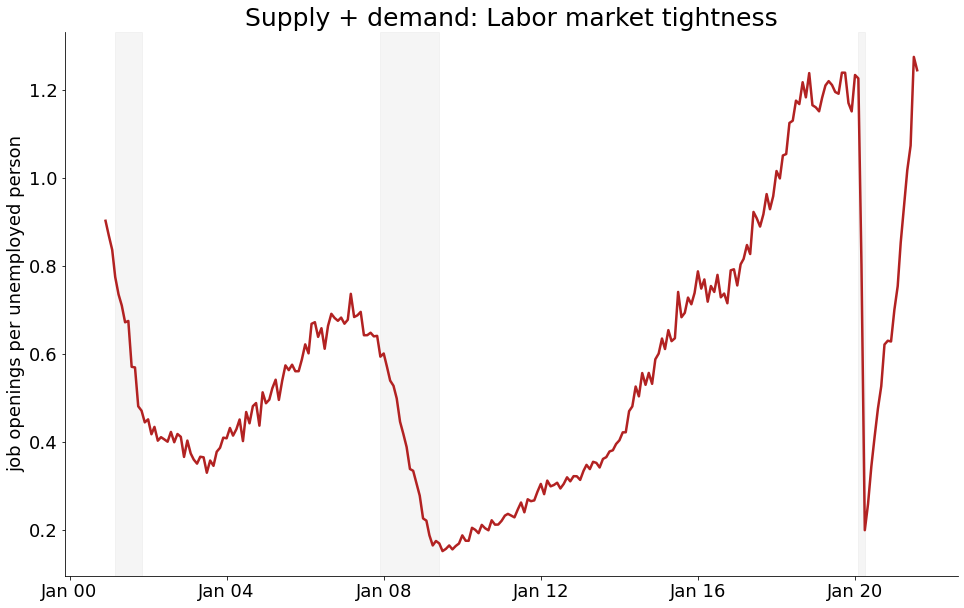

In [23]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.set_title('Supply + demand: Labor market tightness', fontsize=25)
ax.set_ylabel('job openings per unemployed person', fontsize=fig_tick_size)

ax.plot(tight.index, tight['tightness'], color='firebrick', lw=fig_line_wt,  label='WI unemp. rate')
#ax.plot(unemp.index, unemp['UNRATE'], color='black', lw=fig_line_wt, label='National unemp. rate')

#ax.text(dt.datetime(2012,4,20),9, 'National', fontsize=22)
#ax.text(dt.datetime(2010,11,1),6, 'Wisconsin', fontsize=22)

#ax.text(dt.datetime(2016,12,15), 30, 'unemp rate = unemployed / disposable personal income x 100', fontsize=22, ha='right')

#plt.savefig('../figures/unemp_rate.pdf', bbox_inches='tight')
plt.savefig('figures/tightness.svg')


for c in range(32,35):
    ax.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)

sns.despine()

plt.savefig('figures/tightness.svg', bbox_inches='tight')

plt.show()

In [24]:
wages = web.DataReader(['LES1252881600Q'], 'fred', '2000-01-01')       # monthly
wages.tail(2)

,LES1252881600Q
DATE,
2021-01-01,373
2021-04-01,368


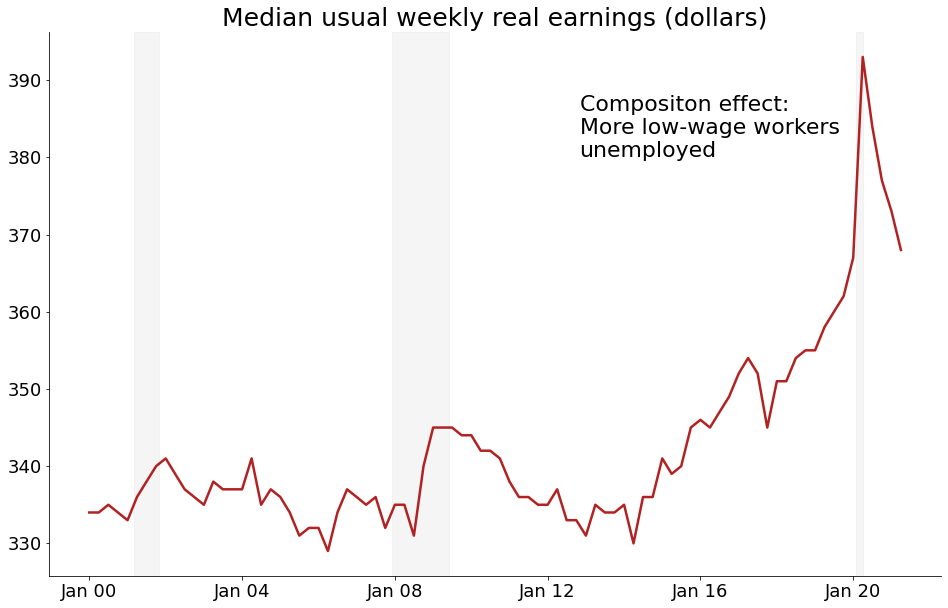

In [25]:
fig, ax = plt.subplots(figsize=(16,10))

ax.tick_params(axis='both', labelsize=fig_tick_size )
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.set_title('Median usual weekly real earnings (dollars)', fontsize=25)
#ax.set_ylabel('job openings per unemployed person', fontsize=fig_tick_size)

ax.plot(wages.index, wages['LES1252881600Q'], color='firebrick', lw=fig_line_wt,  label='WI unemp. rate')
#ax.plot(unemp.index, unemp['UNRATE'], color='black', lw=fig_line_wt, label='National unemp. rate')

#ax.text(dt.datetime(2012,4,20),9, 'National', fontsize=22)
ax.text(dt.datetime(2012,11,1),380, 'Compositon effect:\nMore low-wage workers\nunemployed', fontsize=22)


for c in range(32,35):
    ax.axvspan(cycle.loc[c,'peak'],cycle.loc[c,'trough'], color='silver', alpha=0.15)

sns.despine()

plt.savefig('figures/wages.svg', bbox_inches='tight')

plt.show()